## Characteristics

Scalar_XY is a set of three modules for:

* Generation of 2D (xy-axis) light source.
* Generation of 2D (xy-axis) masks and diffractive optical elements.
* Propagation of light, determination of parameters, and other functions.
* Drawing sources, masks and fields.

These modules are named: scalar_fields_XY.py, scalar_sources_XY.py, and scalar_masks_XY.py.

Each module present a main class:

* Scalar_field_XY
* Scalar_masks_XY
* Scalar_sources_XY

The main attributes for these classes are the following:

* self.x (numpy.array): linear array with equidistant positions. The number of data is preferibly :math:`2^n` .
* self.y (numpy.array): linear array with equidistant positions. The number of data is preferibly :math:`2^n` .
* self.wavelength (float): wavelength of the incident field.
* self.u (numpy.array): complex field with size 2D x.y  

We can also find these atributes:
* self.X (numpy.array): equal size to x * y. complex field
* self.Y (numpy.array): equal size to x * y. complex field
* self.quality (float): quality of RS algorithm. Valid for values > 1.
* self.info (str): description of data.
* self.type (str): Class of the field.
* self.date (str): date when performed.

The dimensional magnitudes are related to microns: `micron = 1.`

**Creating an instance**

In [1]:
from diffractio import sp, nm, plt, np, mm, degrees, um
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY

**Creating a light beam**.
An instance must be created before starting to operate with light sources. The initialization accepts several arguments.     

In [2]:
wavelength = 0.5 * um
x0 = np.linspace(-0.25 * mm, 0.25 * mm, 512)
y0 = np.linspace(-0.25 * mm, 0.25 * mm, 512)

u0 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength, info='u0')


Light sources are defined in the scalar_sources_xy.py module. When the field is initialized, the amplitude of the field is zero. There are many methods that can be used to generate a light source:

* **plane_wave**: Generates a plane wave with a given direction and amplitude
* **gauss_beam**: Generates a gauss beam with a given amplitude, direction, beam-waist and position of beam-waist.
* **spherical_wave**: Generates a spherical wave.
* **vortex_beam**: Generates a vortex beam.
* **laguerre_beam**: Generates a Laguerre beam.
* **hermite_gauss_beam**: Generates a Hermite-Gauss beam.
* **zernike_beam**: Generates aberrated beams using Zernike functions.
* **bessel_beam**: Generates a bessel beam.
* **plane_waves_several_inclined**: Generate several plane waves with different incident angles.
* **plane_waves_dict**: Generate several plane waves with parameters defined in a dictionary. 
* **gauss_beams_several_parallel**: Generates a number of parallel gauss beam at different positions.
* **gauss_beams_several_inclined**: Generates a number of gauss beams all placed at the same position but with different incidence angles.


For a more detailed description of each method, refer to the individual documentation of each one.

**Example**: vortex_beam

In [3]:
u0.vortex_beam(A=1, r0=(0 * um, 0 * um), w0=100 * um, m=3)
print(u0)

Scalar_source_XY
 - x:  (512,),   y:  (512,),   u:  (512, 512)
 - xmin:       -250.00 um,  xmax:      250.00 um,  Dx:   0.98 um
 - ymin:       -250.00 um,  ymax:      250.00 um,  Dy:   0.98 um
 - Imin:       0.00,     Imax:      1.00
 - phase_min:  -180.00 deg, phase_max: 180.00 deg
 - wavelength: 0.50 um
 - date:       2023-10-07_17_08_05
 - info:       u0



Several ways to show the field are defined: 'amplitude', 'intensity', 'field', 'phase',  ...

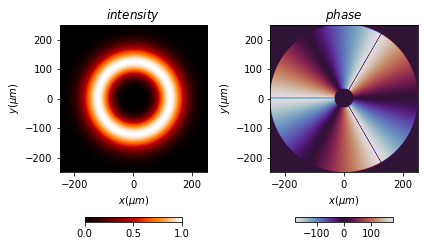

In [4]:
u0.draw(kind='field')


### Basic operations: add to light sources.



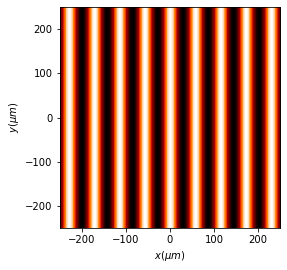

In [5]:
u1 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength, info='u1')
u2 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength, info='u2')

u1.plane_wave(A=1, theta=-.25 * degrees)
u2.plane_wave(A=1, theta=+.25 * degrees)

u_sum = u1 + u2
u_sum.draw(kind='intensity')


Since we have two plane waves propagating at different angles, an interference effect is produced, shown in the intensity variation of the optical field.

**Masks**

Masks are defined in the scalar_masks_xy.py module. There are many methods that can be used to generate masks and diffractive optical elements:

* set_amplitude, set_phase
* binarize, two_levels, gray_scale
* a_dataMatrix
* area
* save_mask
* inverse_amplitude, inverse_phase
* widen
* image
* slit, double_slit, square, circle, super_gauss, square_circle, ring, cross
* mask_from_function
* prism, lens, fresnel_lens
* sine_grating, sine_edge_grating ronchi_grating, binary_grating, blazed_grating, forked_grating, grating2D, grating_2D_ajedrez
* axicon, biprism_fresnel,
* radial_grating, angular_grating, hyperbolic_grating, archimedes_spiral, laguerre_gauss_spiral
* hammer
* roughness, circle_rough, ring_rough, fresnel_lens_rough,


For a more detailed description of each method, refer to the individual documentation of each one.

**Example**: Ronchi grating.

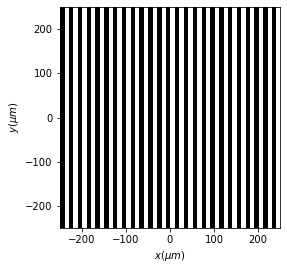

In [6]:
t0 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength, info='t0')
t0.ronchi_grating(x0=0 * um,
                  period=20 * um,
                  fill_factor=0.5,
                  angle=0 * degrees)
t0.draw(kind='intensity')


### Basic operations: multiplication of masks and fields

When the light $u_0$ passes through a mask $t_0$, the field just after the mask, according to the Thin Element Approximation (TEA), is $u_1 = t_0 * u_0$. This can be represented in the following way

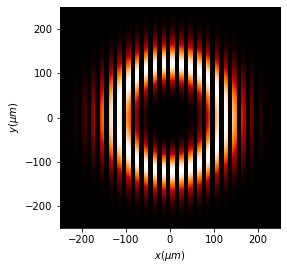

In [7]:
u1 = u0 * t0
u1.draw(kind='intensity')


## Propagation

Propagation and other actions and parameters of the optical fields are defined in the scalar_field_x.py module. There are several methods of determining the field at a given plane after the mask:

* **RS**: Rayleigh-Sommerfeld propagation at a certain distance

* **fft**: Fast Fourier propagation at the far field.

* **ifft**: Inverse Fast Fourier propagation at the far field.


The field can be stored in the same isntance, generate a new instance, or generate a numpy.array when fast computation is required.

### Near field: Rayleigh-Sommerfeld approach

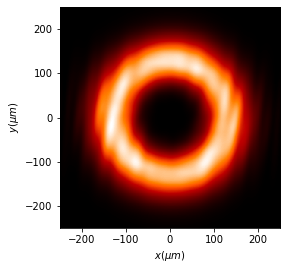

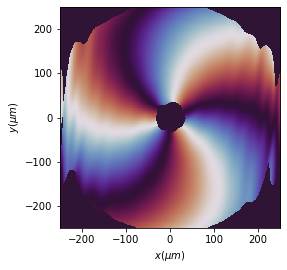

In [8]:
u2 = u1.RS(z=20 * mm, new_field=True)
u2.draw(kind='intensity')
u2.draw(kind='phase')


### Amplification of the field

The Rayleigh-Sommefeld implementation allows an amplification of the field since, sometimes, light diverges:

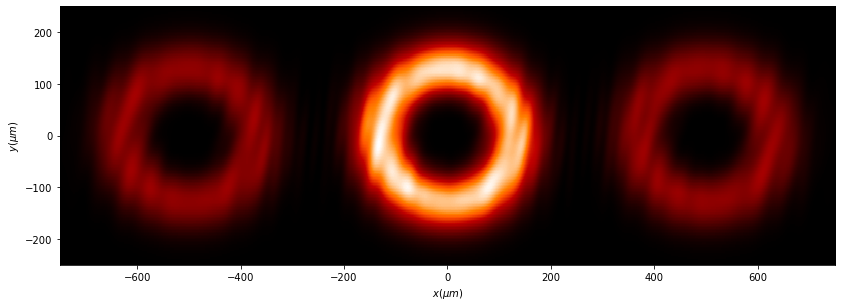

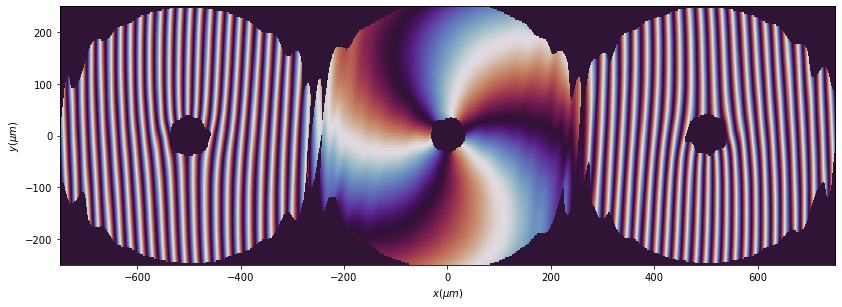

In [9]:
u2 = u1.RS(z=20 * mm, new_field=True, amplification=(3, 1))
u2.draw(kind='intensity', logarithm=False)
fig = plt.gcf()
fig.set_size_inches(13, 6)

u2.draw(kind='phase')
fig = plt.gcf()
fig.set_size_inches(13, 6)


### Reduction of the field

There are some cases where we need to analyze the field in a small area, such as focus of a lens. Then, we can cut and resample the field.

In [10]:
wavelength = 0.5 * um
x0 = np.linspace(-0.5 * mm, 0.5 * mm, 1024)
y0 = np.linspace(-0.5 * mm, 0.5 * mm, 1024)

focal = 25 * mm

u0 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength, info='u0')
u0.plane_wave(A=1, theta=0 * degrees, phi=0 * degrees)

t0 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength, info='t0')
t0.lens(r0=(0, 0), radius=(500 * um, 500 * um), focal=(focal, focal))


The field at focal distance results:

In [11]:
%%time

u1=t0*u0

u2=u1.RS(z=focal, verbose=False)
u2.normalize();

CPU times: user 1.79 s, sys: 730 ms, total: 2.52 s
Wall time: 2.53 s


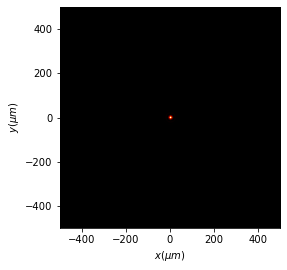

In [12]:
u2.draw(kind='intensity')


As, the focus cannot be seen properly, we can reduce the field to the desired size.

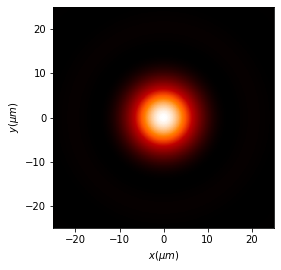

In [13]:
u2.cut_resample(x_limits=(-25 * um, 25 * um),
                y_limits=(-25 * um, 25 * um),
                num_points=(512, 512),
                new_field=False)
u2.draw(kind='intensity', logarithm=False)


A better possibility is to use CZT algorithm to determine the field at reduced output coordinates.

In [14]:
%%time
xout=np.linspace(-20,20,128)
yout=np.linspace(-20,20,128)


u2 = u1.CZT(z=focal, xout=xout, yout=yout)
u2.normalize()


CPU times: user 271 ms, sys: 341 ms, total: 612 ms
Wall time: 614 ms


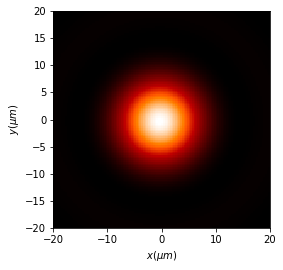

In [15]:
u2.draw(kind='intensity')


### Focus position and profiles
For focus and other application, the software can detect the position of maximum intensity and determine the profiles in order to a better analysis.

x = -0.283 um, y = -0.283 um


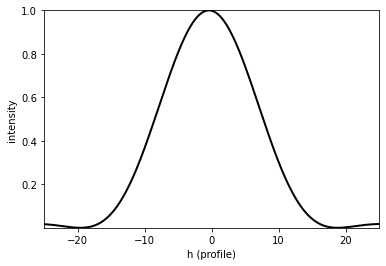

In [16]:
x_max, y_max = u2.search_focus(verbose=True)

u2.draw_profile(point1=[-25 * um, x_max],
                point2=[25 * um, x_max],
                npixels=512,
                kind='intensity',
                order=2)
